In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows',100)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [2]:
# Load DataSet
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

##### Step 1 - EDA

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
train.drop(["Id"],axis=1,inplace=True)

In [6]:
train.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [7]:
train.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [8]:
for feature in train.columns:
    if train[feature].isnull().sum()>0:
        print(feature)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [9]:
nullCols=[feature for feature in train.columns if train[feature].isnull().sum()>0]
nullCols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [10]:
train.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [11]:
train.shape[0]

1460

In [12]:
trainNullPer= train.apply(lambda x : np.round(100*x.isnull().sum()/train.shape[0],2))
trainNullCount=train.isnull().sum()
trainNullDF=pd.DataFrame([trainNullCount,trainNullPer]).T
trainNullDF.columns=['NullValues','NullPercentage']
trainNullDF.sort_values(by='NullValues',ascending=False,inplace=True)
trainNullDF.reset_index(inplace=True)
trainNullDF.head(10)

,index,NullValues,NullPercentage
0,PoolQC,1453.0,99.52
1,MiscFeature,1406.0,96.30
2,Alley,1369.0,93.77
3,Fence,1179.0,80.75
4,FireplaceQu,690.0,47.26
5,LotFrontage,259.0,17.74
6,GarageYrBlt,81.0,5.55
7,GarageCond,81.0,5.55
8,GarageType,81.0,5.55
9,GarageFinish,81.0,5.55


In [13]:
# Dropping the columns more than 50% of null values
train.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],axis=1,inplace=True)

In [14]:
trainNullPer= train.apply(lambda x : np.round(100*x.isnull().sum()/train.shape[0],2))
trainNullCount=train.isnull().sum()
trainNullDF=pd.DataFrame([trainNullCount,trainNullPer]).T
trainNullDF.columns=['NullValues','NullPercentage']
trainNullDF.sort_values(by='NullValues',ascending=False,inplace=True)
trainNullDF.reset_index(inplace=True)
trainNullDF.head(10)

,index,NullValues,NullPercentage
0,LotFrontage,259.0,17.74
1,GarageType,81.0,5.55
2,GarageYrBlt,81.0,5.55
3,GarageFinish,81.0,5.55
4,GarageQual,81.0,5.55
5,GarageCond,81.0,5.55
6,BsmtFinType2,38.0,2.60
7,BsmtExposure,38.0,2.60
8,BsmtQual,37.0,2.53
9,BsmtCond,37.0,2.53


In [15]:
trainNullDF.head(20)

,index,NullValues,NullPercentage
0,LotFrontage,259.0,17.74
1,GarageType,81.0,5.55
2,GarageYrBlt,81.0,5.55
3,GarageFinish,81.0,5.55
4,GarageQual,81.0,5.55
5,GarageCond,81.0,5.55
6,BsmtFinType2,38.0,2.60
7,BsmtExposure,38.0,2.60
8,BsmtQual,37.0,2.53
9,BsmtCond,37.0,2.53


In [16]:
nullColumns = np.array(trainNullDF[:14]["index"])
nullColumns

array(['LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'MasVnrType',
       'Electrical'], dtype=object)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 no

In [18]:
train["GarageYrBlt"].dtype

dtype('float64')

In [19]:
for column in nullColumns:
    if train[column].dtype=="object":
        print(column)
        train[column].fillna(train[column].mode()[0],inplace=True)
    else:
        print(f"{column} this is numerical")
        train[column].fillna(train[column].median(),inplace=True)

LotFrontage this is numerical
GarageType
GarageYrBlt this is numerical
GarageFinish
GarageQual
GarageCond
BsmtFinType2
BsmtExposure
BsmtQual
BsmtCond
BsmtFinType1
MasVnrArea this is numerical
MasVnrType
Electrical


In [20]:
trainNullPer= train.apply(lambda x : np.round(100*x.isnull().sum()/train.shape[0],2))
trainNullCount=train.isnull().sum()
trainNullDF=pd.DataFrame([trainNullCount,trainNullPer]).T
trainNullDF.columns=['NullValues','NullPercentage']
trainNullDF.sort_values(by='NullValues',ascending=False,inplace=True)
trainNullDF.reset_index(inplace=True)
trainNullDF.head(10)

,index,NullValues,NullPercentage
0,MSSubClass,0.0,0.0
1,GarageYrBlt,0.0,0.0
2,Fireplaces,0.0,0.0
3,Functional,0.0,0.0
4,TotRmsAbvGrd,0.0,0.0
5,KitchenQual,0.0,0.0
6,KitchenAbvGr,0.0,0.0
7,BedroomAbvGr,0.0,0.0
8,HalfBath,0.0,0.0
9,FullBath,0.0,0.0


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

In [22]:
numericalColumns = train.select_dtypes(include=np.number).columns
numericalColumns 


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [23]:
objectColumns = train.select_dtypes(include=np.object).columns
objectColumns 

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

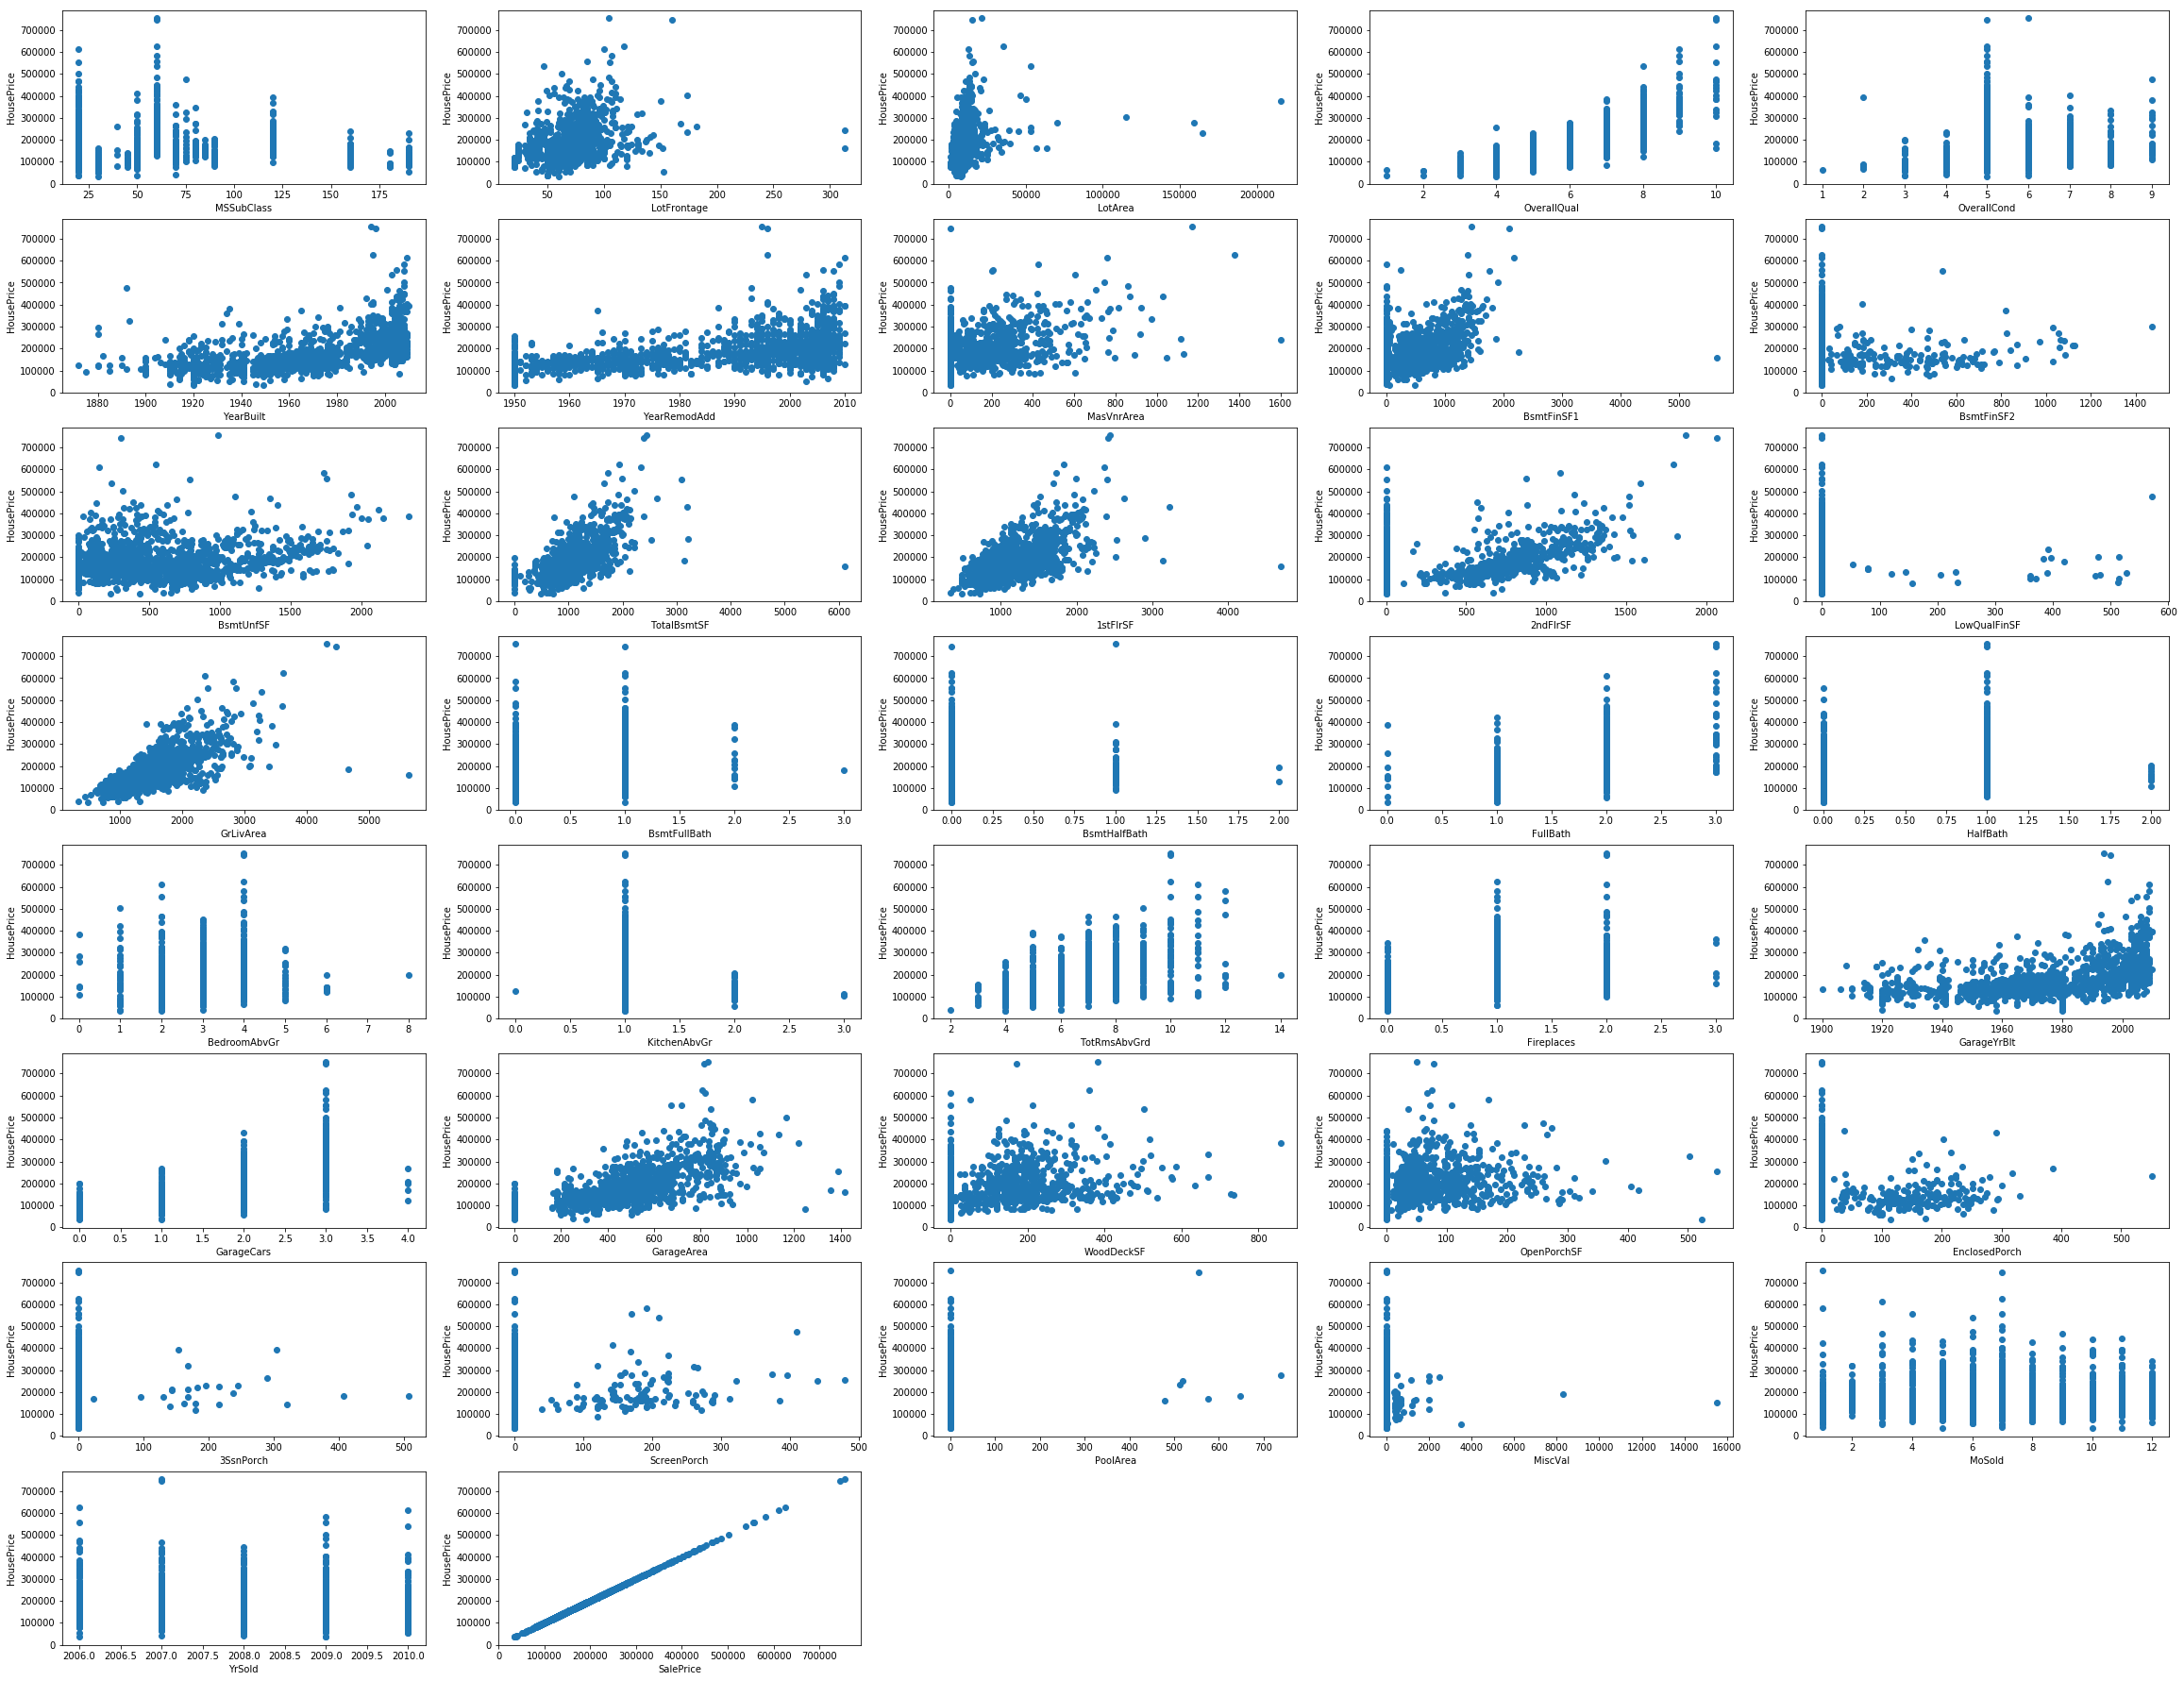

In [24]:
j=0
plt.figure(figsize=(40,40))
for column in numericalColumns:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train['SalePrice'])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1

In [25]:
train["MSSubClass"].nunique()

15

In [26]:
train["LotFrontage"].nunique()

110

In [27]:
descriateCols=[]
continuesCols=[]

for column in numericalColumns:
    if train[column].nunique()>20:
        continuesCols.append(column)
    else:
        descriateCols.append(column)

In [28]:
continuesCols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [29]:
descriateCols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold',
 'YrSold']

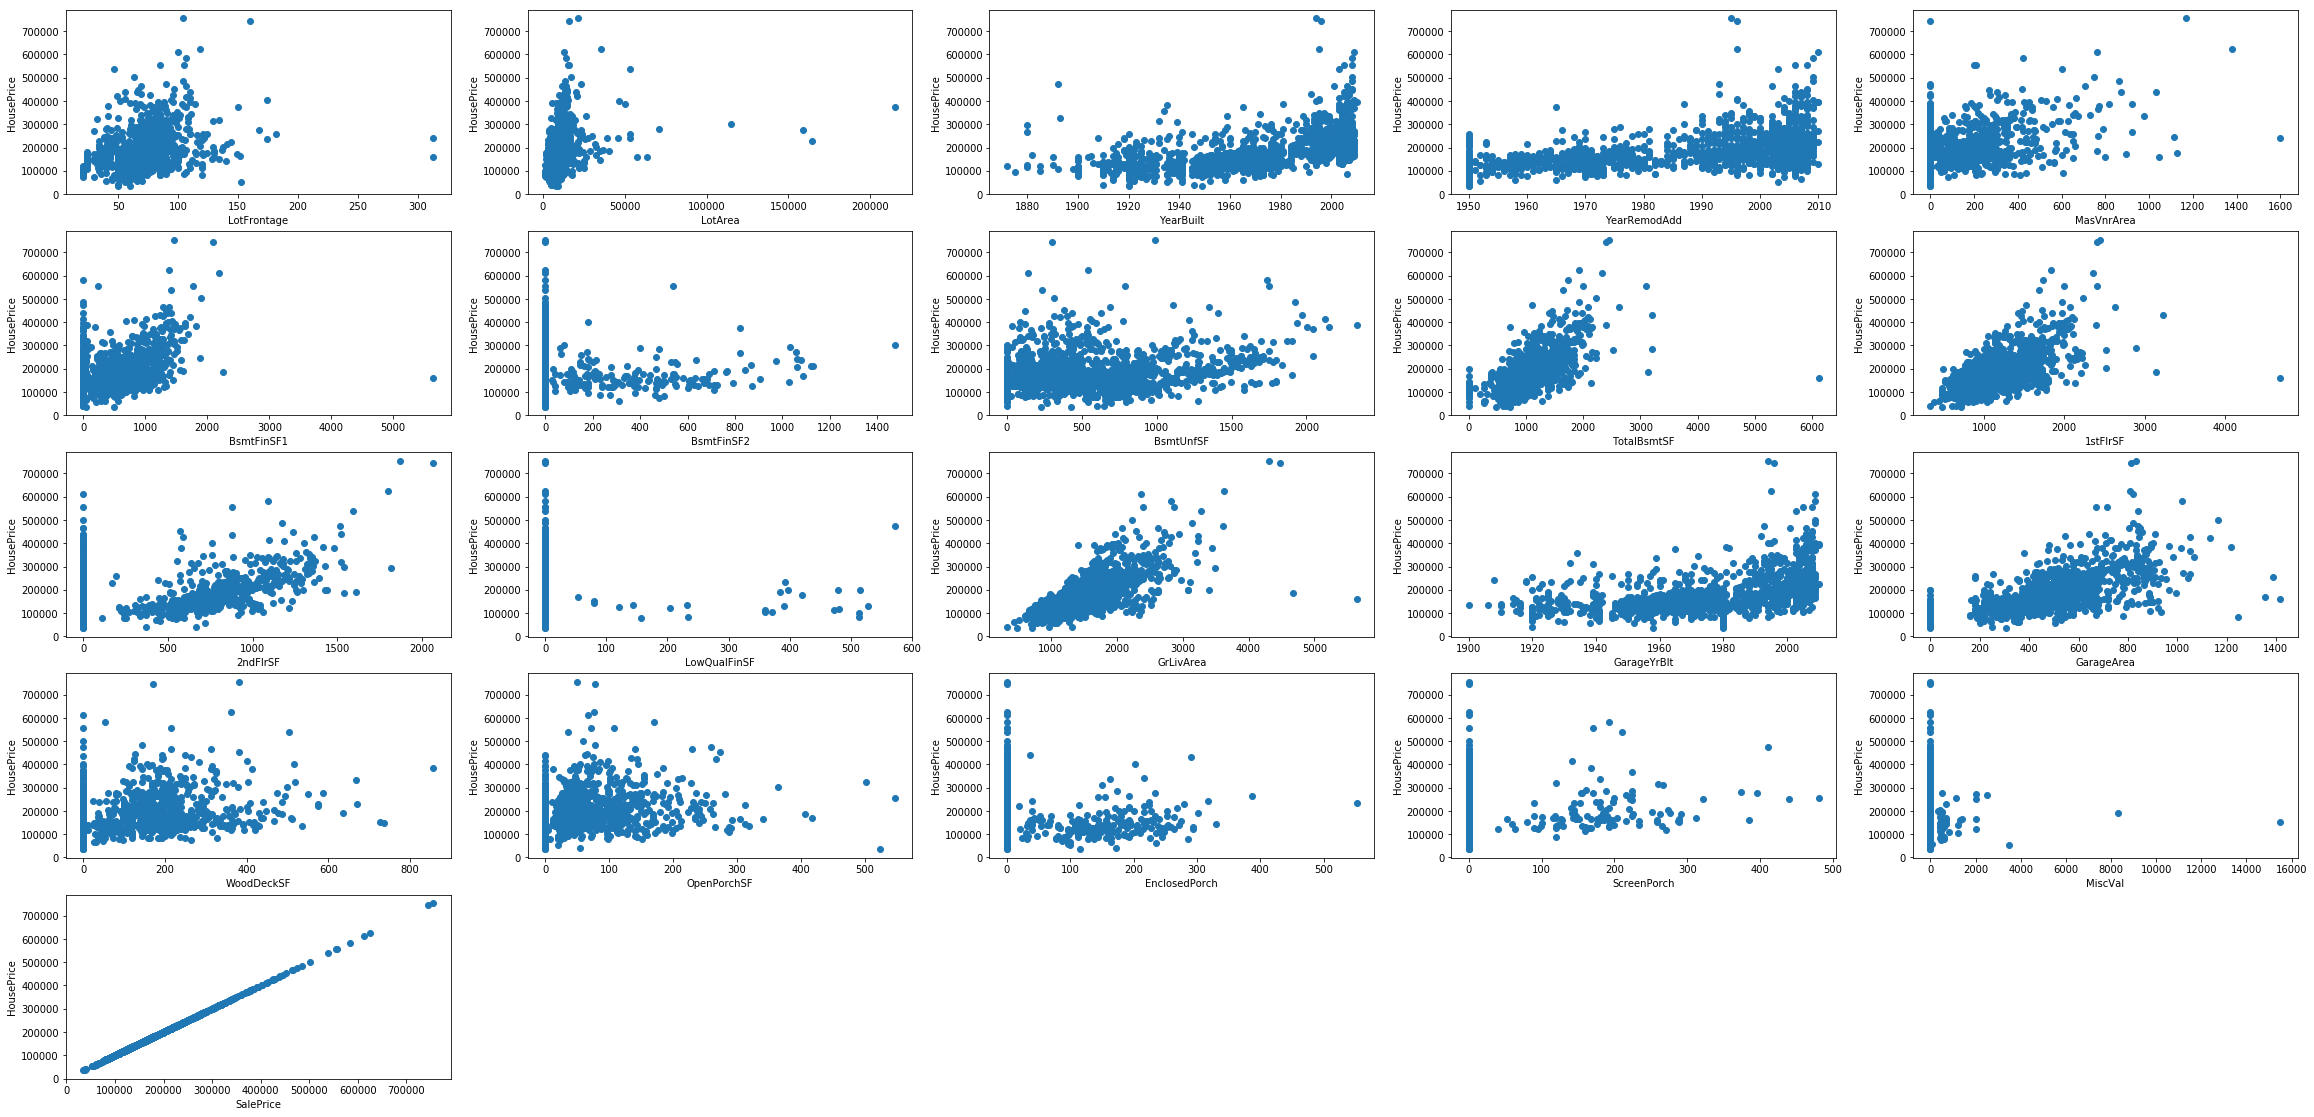

In [30]:
j=0
plt.figure(figsize=(40,40))
for column in continuesCols:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train['SalePrice'])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1

In [31]:
# import matplotlib.gridspec as gridspec

# plt.figure(figsize=(12,28*4))
# gs = gridspec.GridSpec(28, 1)
# for i, cn in enumerate(continuesCols):
#     ax = plt.subplot(gs[i])
#     sns.distplot(train[cn][train.Class == 1], bins=50)
#     sns.distplot(train[cn][train.Class == 0], bins=50)
#     ax.set_xlabel('')
#     ax.set_title('histogram of feature: ' + str(cn))
# plt.show()

In [32]:
descriateCols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold',
 'YrSold']

<BarContainer object of 10 artists>

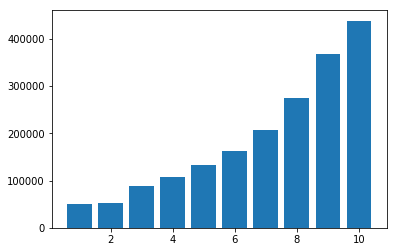

In [33]:
observationVal = train.groupby('OverallQual')['SalePrice'].mean()
observationValDF=pd.DataFrame(observationVal).sort_values(by = 'SalePrice',ascending=False)
observationValDF.reset_index(inplace =True)
plt.bar(observationValDF['OverallQual'],observationValDF['SalePrice'])

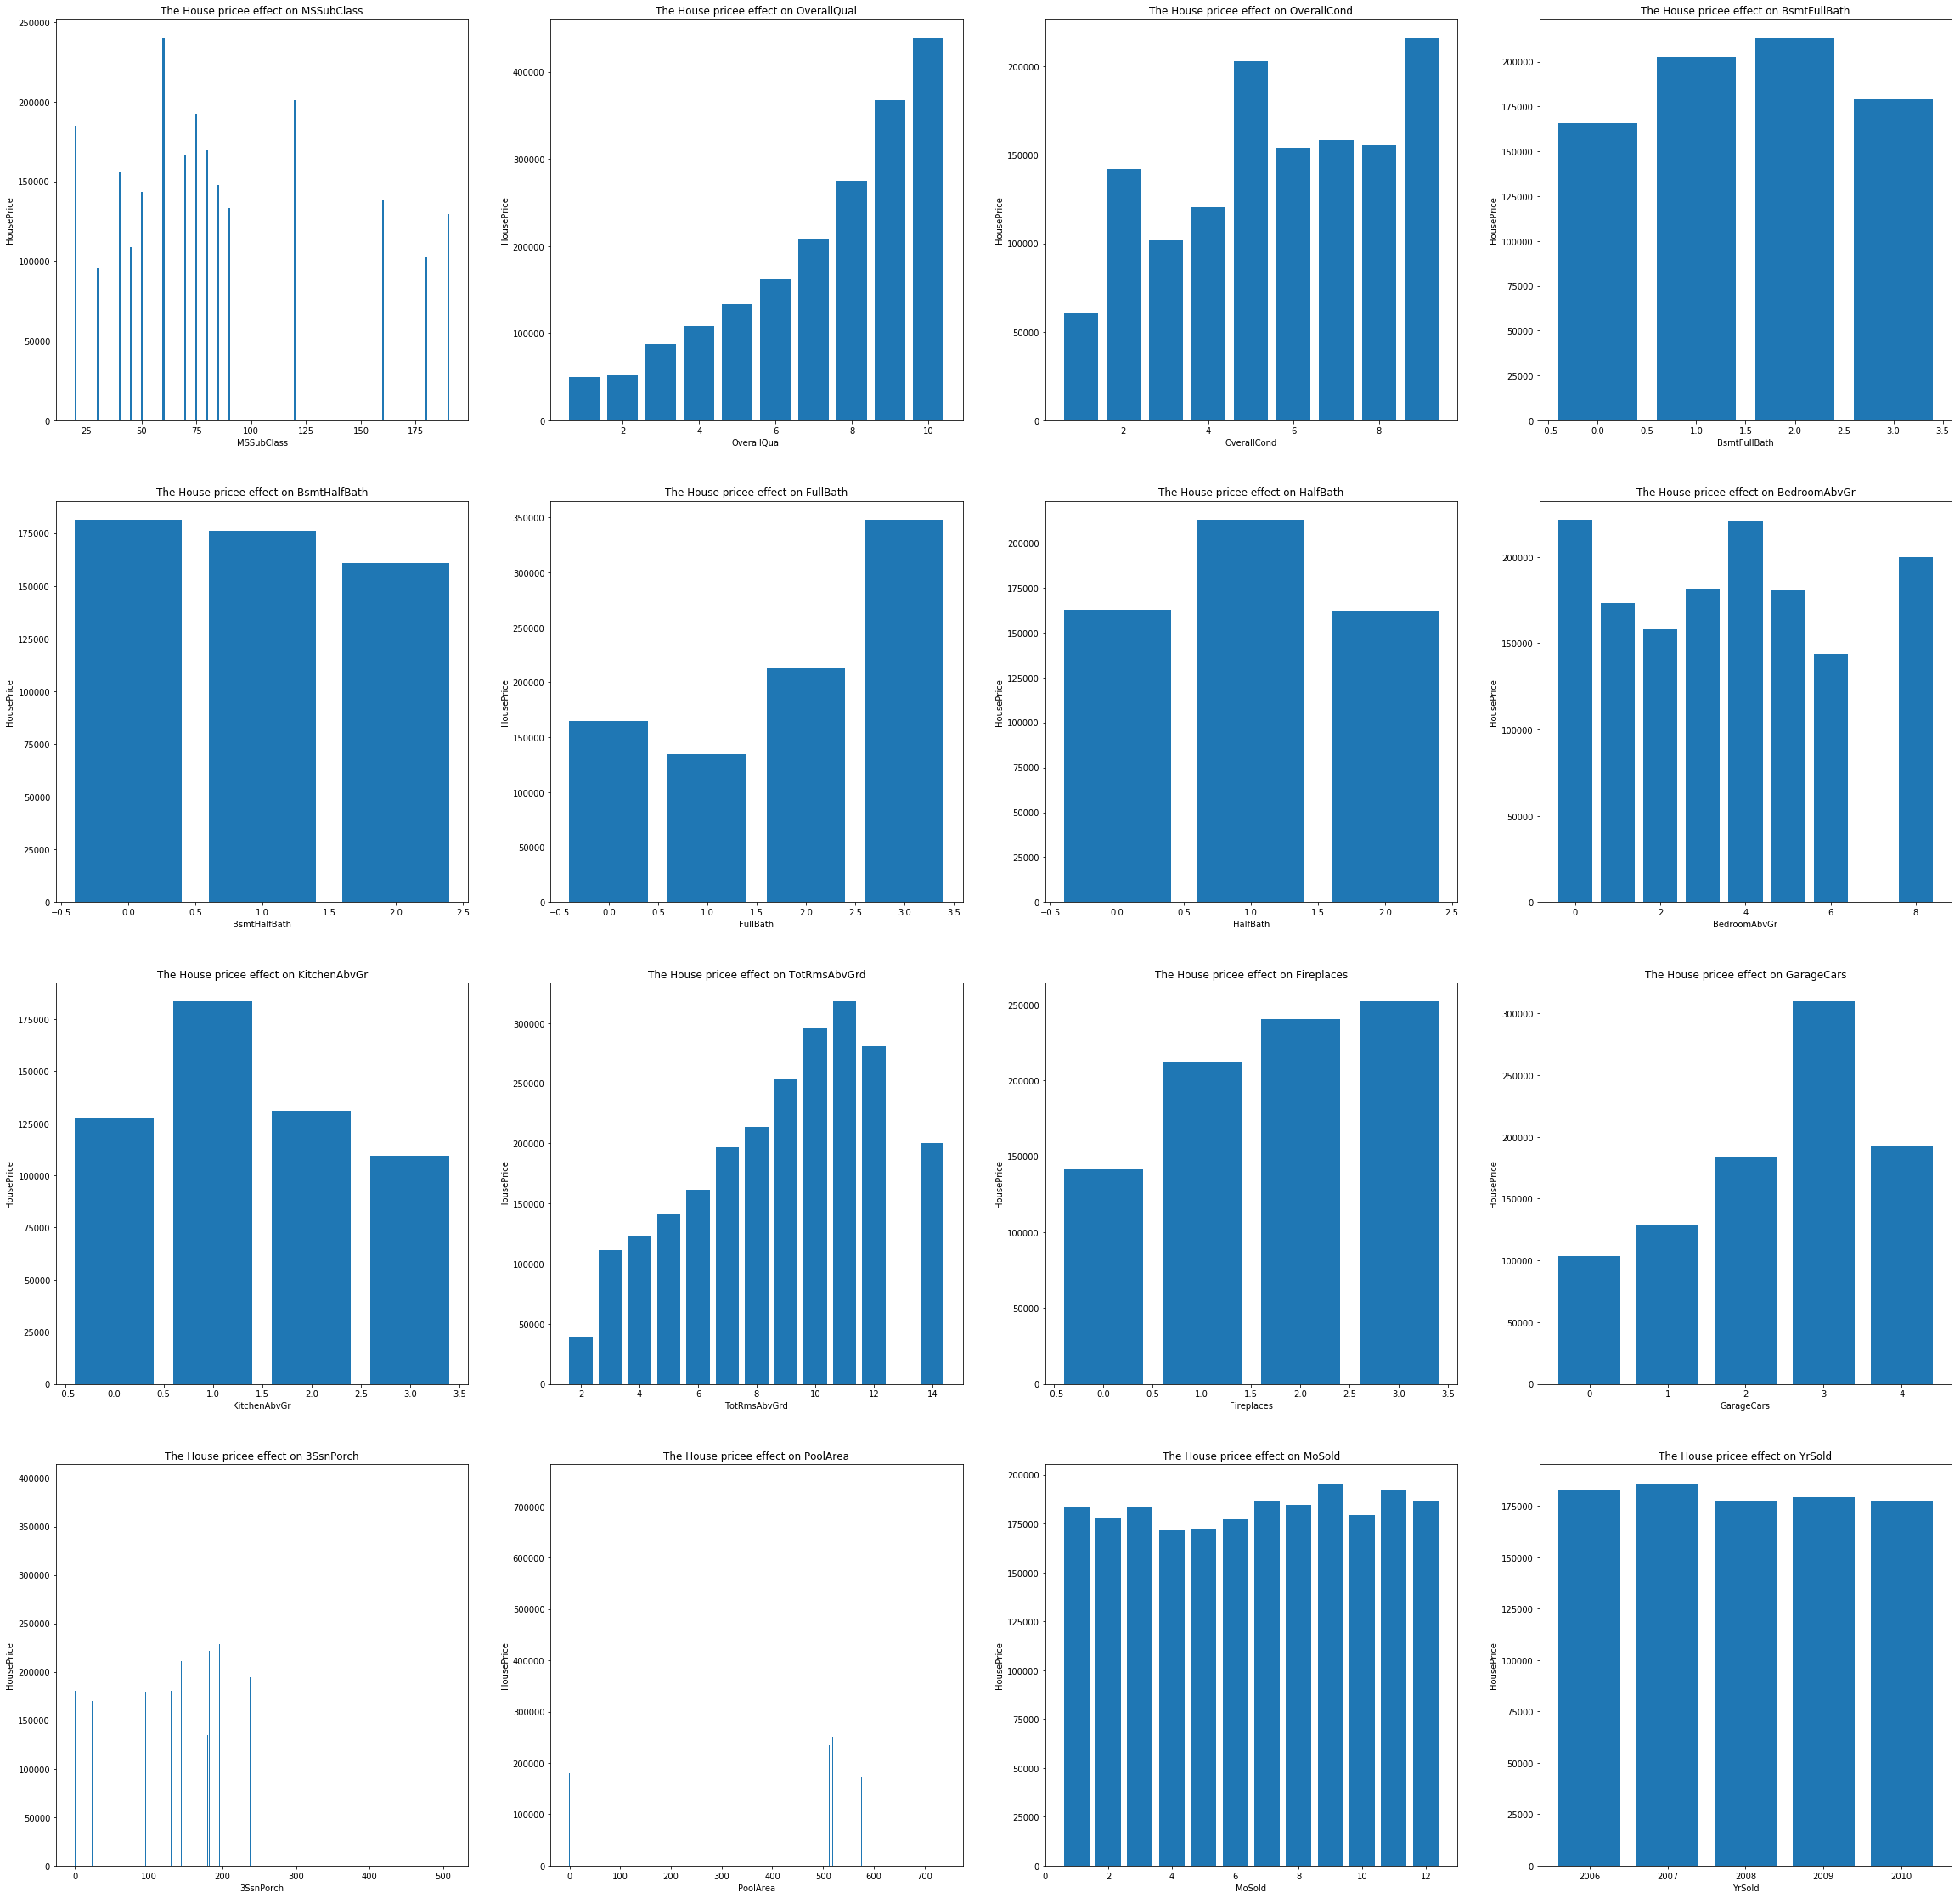

In [34]:
j=0
plt.figure(figsize=(40,40))
for column in descriateCols:
    plt.subplot(4,4,j+1)
    observationVal = train.groupby(column)['SalePrice'].mean()
    observationValDF=pd.DataFrame(observationVal).sort_values(by = 'SalePrice',ascending=False)
    observationValDF.reset_index(inplace =True)
    plt.bar(observationValDF[column],observationValDF['SalePrice'])
    plt.title(f"The House pricee effect on {column}")
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1

In [35]:
len(objectColumns)

38

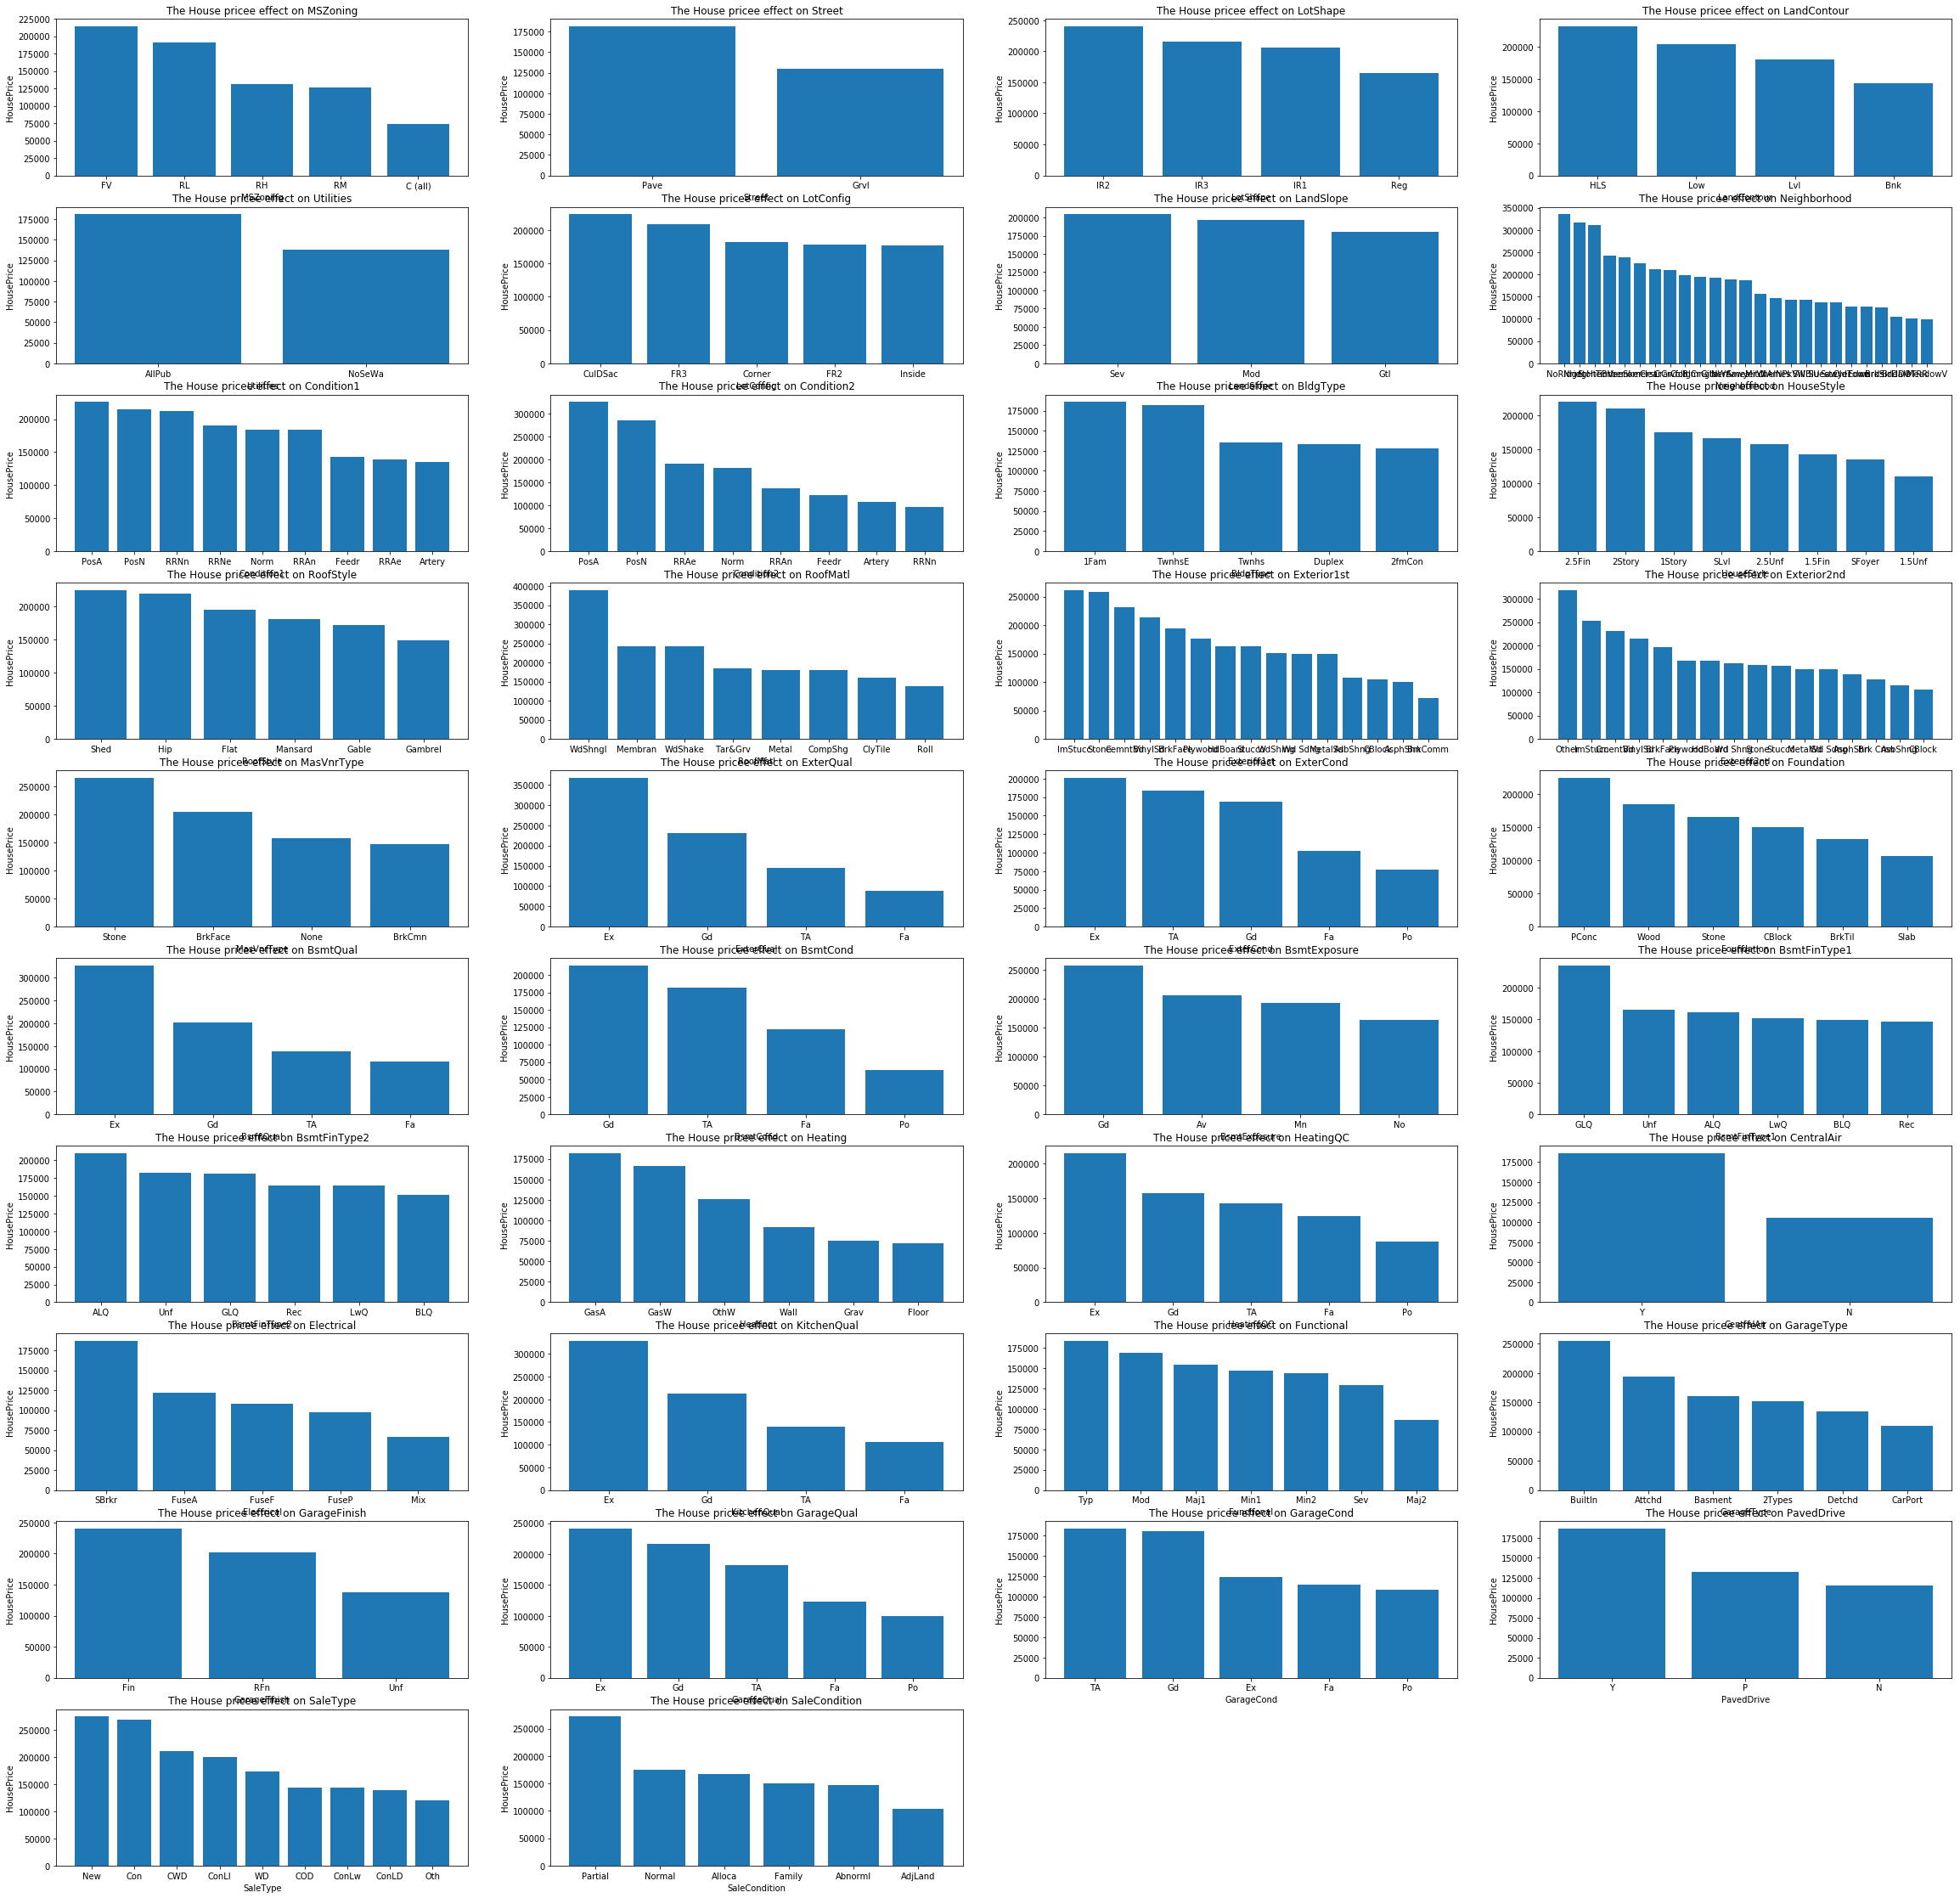

In [36]:

j=0
plt.figure(figsize=(40,40))
for column in objectColumns:
    plt.subplot(10,4,j+1)
    observationVal = train.groupby(column)['SalePrice'].mean()
    observationValDF=pd.DataFrame(observationVal).sort_values(by = 'SalePrice',ascending=False)
    observationValDF.reset_index(inplace =True)
    plt.bar(observationValDF[column],observationValDF['SalePrice'])
    plt.title(f"The House pricee effect on {column}")
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1

#### Handling Outliers

In [37]:
continuesCols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [38]:
train.shape

(1460, 75)

In [39]:
train['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [40]:
upper_lim=train['LotFrontage'].mean()+train['LotFrontage'].std() *3
lower_lim=train['LotFrontage'].mean()-train['LotFrontage'].std() *3

train.loc[(train['LotFrontage'] >upper_lim),'LotFrontage'] = upper_lim
train.loc[(train['LotFrontage'] < lower_lim),'LotFrontage'] = lower_lim

In [41]:
for column in continuesCols:
    upper_lim=train[column].mean()+train[column].std() *3
    lower_lim=train[column].mean()-train[column].std() *3

    train.loc[(train[column] > upper_lim),column] = upper_lim
    train.loc[(train[column] < lower_lim),column] = lower_lim

In [42]:
lower_lim

-57406.31275824897

In [43]:
train[(train['LotFrontage'] <= upper_lim) & (train['LotFrontage'] >= lower_lim) ]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.000000,0,0.000000,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.000000,0,0.000000,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.000000,0,0.000000,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,205.311555,0,0.000000,0,0.000000,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.000000,0,0.000000,12,2008,WD,Normal,250000.0
5,50,RL,85.0,14115.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.000000,320,0.000000,0,700.000000,10,2009,WD,Normal,143000.0
6,20,RL,75.0,10084.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.000000,0,0.000000,8,2007,WD,Normal,307000.0
7,60,RL,69.0,10382.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,205.311555,0,0.000000,0,350.000000,11,2009,WD,Normal,200000.0
8,50,RM,51.0,6120.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205.000000,0,0.000000,0,0.000000,4,2008,WD,Abnorml,129900.0
9,190,RL,50.0,7420.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0.000000,0,0.000000,0,0.000000,1,2008,WD,Normal,118000.0


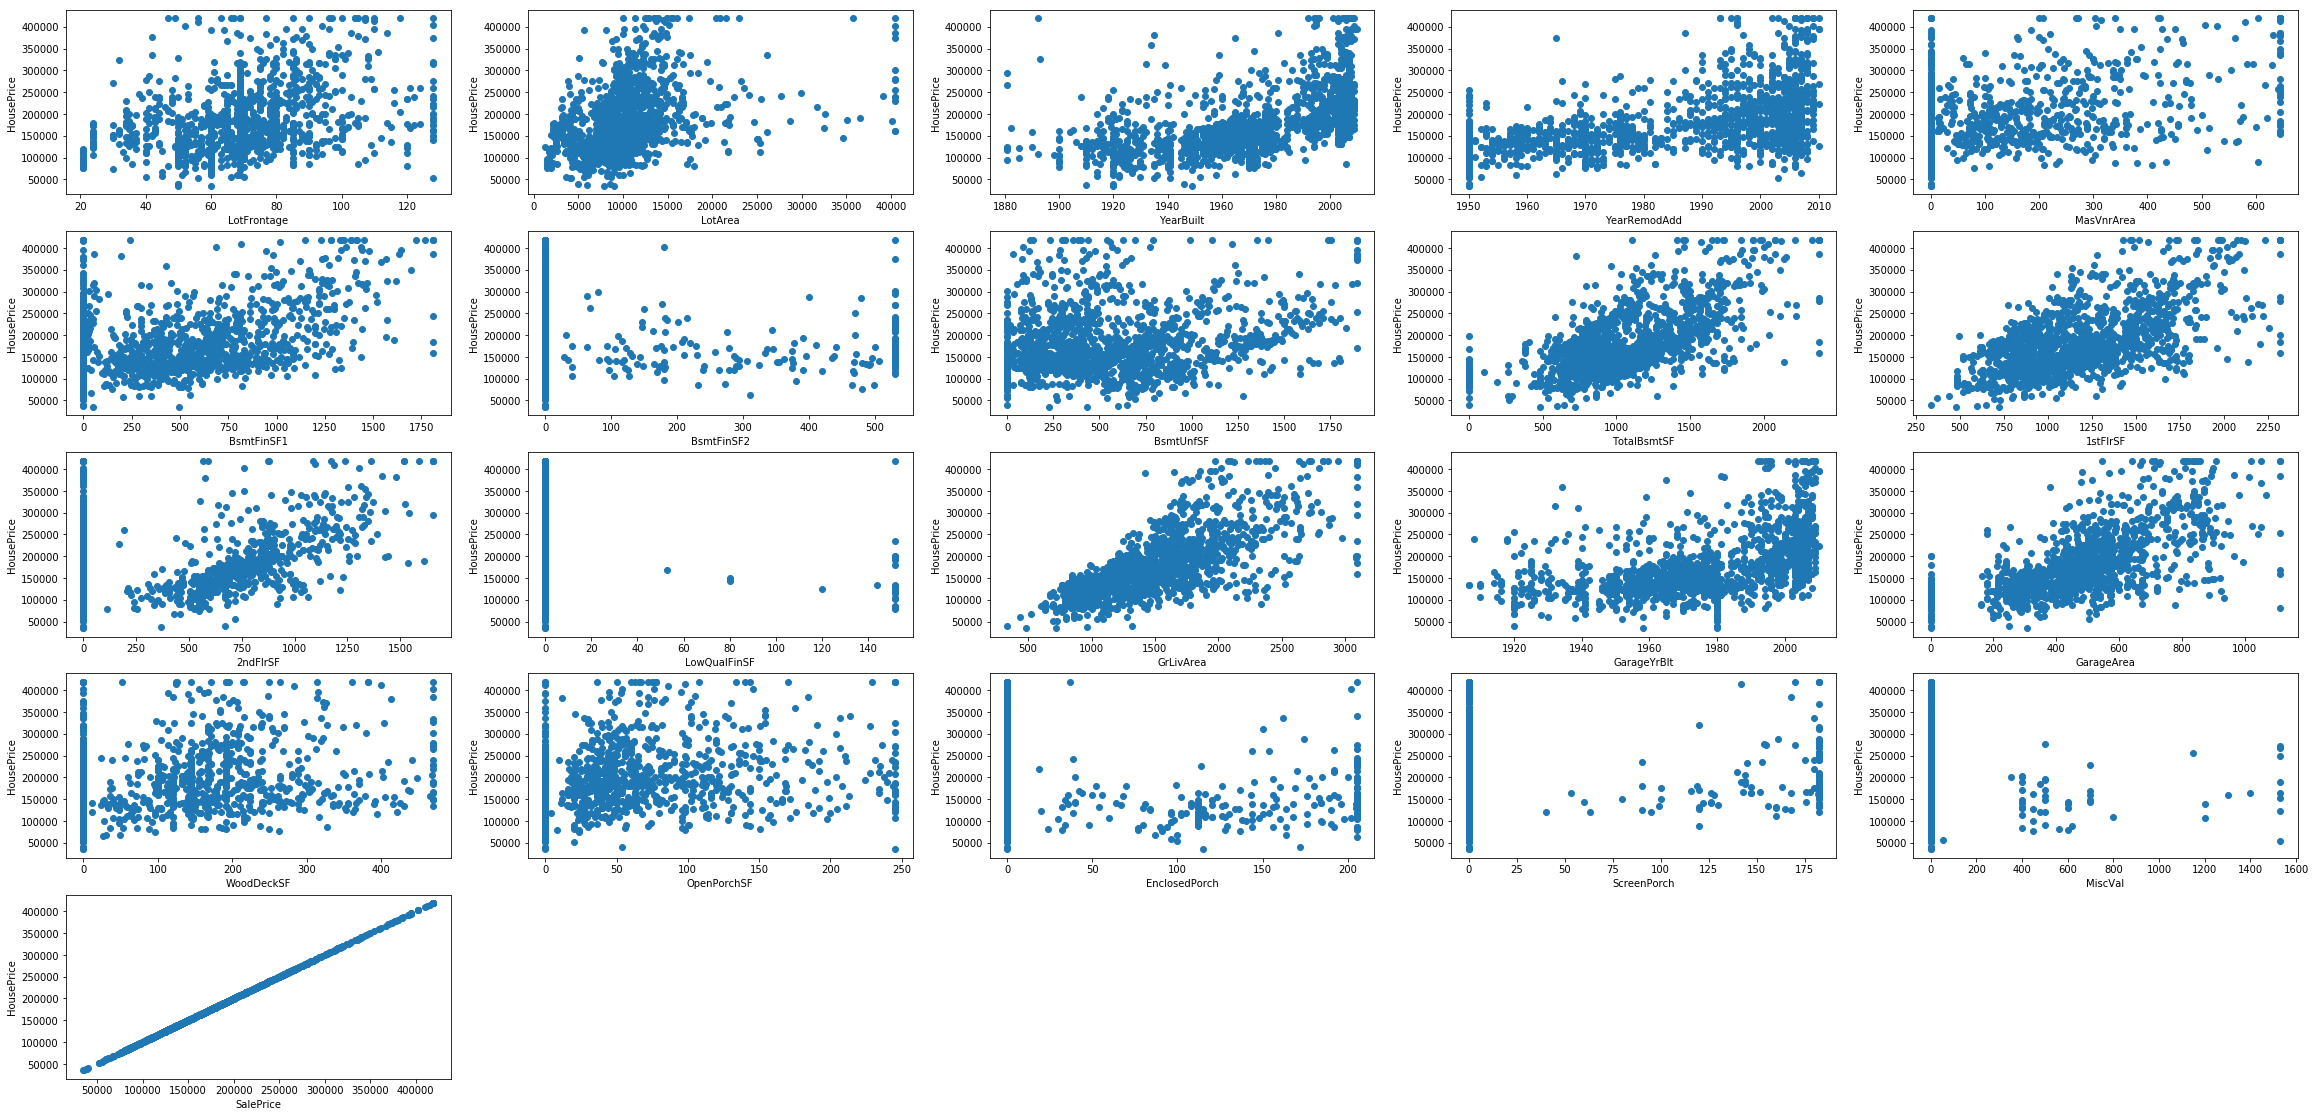

In [44]:
j=0
plt.figure(figsize=(40,40))
for column in continuesCols:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train['SalePrice'])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1

In [45]:
objectColumns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [46]:
MSZoningLE=LabelEncoder()
MSZoningLE.fit_transform(train["MSZoning"])
StreetLE=LabelEncoder()
StreetLE.fit_transform(train["Street"])

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [47]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.000000,0,0.000000,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.000000,0,0.000000,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.000000,0,0.000000,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,205.311555,0,0.000000,0,0.000000,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.000000,0,0.000000,12,2008,WD,Normal,250000.0
5,50,RL,85.0,14115.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.000000,320,0.000000,0,700.000000,10,2009,WD,Normal,143000.0
6,20,RL,75.0,10084.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.000000,0,0.000000,8,2007,WD,Normal,307000.0
7,60,RL,69.0,10382.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,205.311555,0,0.000000,0,350.000000,11,2009,WD,Normal,200000.0
8,50,RM,51.0,6120.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205.000000,0,0.000000,0,0.000000,4,2008,WD,Abnorml,129900.0
9,190,RL,50.0,7420.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0.000000,0,0.000000,0,0.000000,1,2008,WD,Normal,118000.0


In [48]:
trainObjectDF = train[objectColumns]

In [49]:
trainObjectDF

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
7,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
8,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,...,FuseF,TA,Min1,Detchd,Unf,Fa,TA,Y,WD,Abnorml
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,...,SBrkr,TA,Typ,Attchd,RFn,Gd,TA,Y,WD,Normal


In [50]:
from collections import defaultdict
defaultEncoder= defaultdict(LabelEncoder)


# variable enconding
fittrainObjectDF= trainObjectDF.apply(lambda x: defaultEncoder[x.name].fit_transform(x))



In [51]:
fittrainObjectDF

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4
5,3,1,0,3,0,4,0,11,2,2,...,4,3,6,1,2,4,4,2,8,4
6,3,1,3,3,0,4,0,21,2,2,...,4,2,6,1,1,4,4,2,8,4
7,3,1,0,3,0,0,0,14,4,2,...,4,3,6,1,1,4,4,2,8,4
8,4,1,3,3,0,4,0,17,0,2,...,1,3,2,5,2,1,4,2,8,0
9,3,1,3,3,0,0,0,3,0,0,...,4,3,6,1,1,2,4,2,8,4


In [52]:
defaultEncoder['LotShape'].transform(["Reg"])

array([3], dtype=int64)

In [53]:
objectColumns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [54]:
# pd.concat([df,df1], axis=1, ignore_index=True)

In [55]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.0,0,0.0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,205.311555,0,0.0,0,0.0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.0,0,0.0,12,2008,WD,Normal,250000.0


In [56]:
fittrainObjectDF.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4


In [57]:
train.drop(objectColumns,axis=1,inplace=True)

In [58]:
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450.0,7,5,2003.0,2003.0,196.0,706.0,0.0,...,0.0,61.0,0.000000,0,0.0,0,0.0,2,2008,208500.0
1,20,80.0,9600.0,6,8,1976.0,1976.0,0.0,978.0,0.0,...,298.0,0.0,0.000000,0,0.0,0,0.0,5,2007,181500.0
2,60,68.0,11250.0,7,5,2001.0,2002.0,162.0,486.0,0.0,...,0.0,42.0,0.000000,0,0.0,0,0.0,9,2008,223500.0
3,70,60.0,9550.0,7,5,1915.0,1970.0,0.0,216.0,0.0,...,0.0,35.0,205.311555,0,0.0,0,0.0,2,2006,140000.0
4,60,84.0,14260.0,8,5,2000.0,2000.0,350.0,655.0,0.0,...,192.0,84.0,0.000000,0,0.0,0,0.0,12,2008,250000.0


In [59]:
updatedTrain = pd.concat([train,fittrainObjectDF],axis=1)

In [60]:
updatedTrain.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,65.0,8450.0,7,5,2003.0,2003.0,196.0,706.0,0.0,...,4,2,6,1,1,4,4,2,8,4
1,20,80.0,9600.0,6,8,1976.0,1976.0,0.0,978.0,0.0,...,4,3,6,1,1,4,4,2,8,4
2,60,68.0,11250.0,7,5,2001.0,2002.0,162.0,486.0,0.0,...,4,2,6,1,1,4,4,2,8,4
3,70,60.0,9550.0,7,5,1915.0,1970.0,0.0,216.0,0.0,...,4,2,6,5,2,4,4,2,8,0
4,60,84.0,14260.0,8,5,2000.0,2000.0,350.0,655.0,0.0,...,4,2,6,1,1,4,4,2,8,4


In [61]:
corrDF = updatedTrain.corr()

In [62]:
corrDF

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
MSSubClass,1.000000,-0.400658,-0.279702,0.032628,-0.059316,0.027944,0.040581,0.020520,-0.073235,-0.066358,...,0.051945,0.010129,0.003711,0.090719,0.012301,0.007630,0.002927,-0.059925,0.012464,-0.024940
LotFrontage,-0.400658,1.000000,0.455607,0.237468,-0.059285,0.126277,0.076991,0.187109,0.146296,0.044964,...,0.063530,-0.185197,0.030656,-0.236666,-0.222537,0.051435,0.043985,0.097751,-0.033825,0.066170
LotArea,-0.279702,0.455607,1.000000,0.181943,-0.015925,0.037913,0.038069,0.153834,0.239187,0.082894,...,0.059112,-0.114712,-0.044227,-0.175576,-0.168933,0.019339,0.038518,0.014115,0.001833,0.045476
OverallQual,0.032628,0.237468,0.181943,1.000000,-0.091932,0.573183,0.550684,0.416804,0.230085,-0.085303,...,0.254127,-0.555348,0.161047,-0.297995,-0.538529,0.090562,0.144988,0.229393,-0.060472,0.193703
OverallCond,-0.059316,-0.059285,-0.015925,-0.091932,1.000000,-0.376205,0.073741,-0.131177,-0.044549,0.054472,...,0.062664,0.067984,0.094040,0.163126,0.191063,-0.094761,-0.032236,-0.062236,0.095267,0.017758
YearBuilt,0.027944,0.126277,0.037913,0.573183,-0.376205,1.000000,0.593659,0.328898,0.252930,-0.063908,...,0.338915,-0.359384,0.154651,-0.443934,-0.590385,0.304135,0.246913,0.427485,-0.052367,0.201311
YearRemodAdd,0.040581,0.076991,0.038069,0.550684,0.073741,0.593659,1.000000,0.182833,0.126435,-0.088854,...,0.344514,-0.452431,0.079903,-0.271764,-0.456786,0.130241,0.150579,0.168457,0.019647,0.221687
MasVnrArea,0.020520,0.187109,0.153834,0.416804,-0.131177,0.328898,0.182833,1.000000,0.250260,-0.076081,...,0.116759,-0.263543,0.092105,-0.178620,-0.278422,0.113714,0.071267,0.154841,-0.062240,0.085328
BsmtFinSF1,-0.073235,0.146296,0.239187,0.230085,-0.044549,0.252930,0.126435,0.250260,1.000000,-0.041027,...,0.157218,-0.178807,0.044579,-0.242146,-0.246545,0.127551,0.100624,0.197006,0.012959,0.027687
BsmtFinSF2,-0.066358,0.044964,0.082894,-0.085303,0.054472,-0.063908,-0.088854,-0.076081,-0.041027,1.000000,...,0.015672,0.079340,-0.108940,-0.016654,0.044394,0.045400,-0.008157,0.067335,-0.029363,-0.057059


In [63]:
corrColumns = abs(corrDF['SalePrice']).sort_values(ascending=False)

In [64]:
finalColumns = corrColumns[corrColumns>0.4].index

In [65]:
finalColumns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', 'ExterQual', '1stFlrSF', 'BsmtQual', 'KitchenQual',
       'FullBath', 'GarageFinish', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd',
       'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'HeatingQC', 'Foundation'],
      dtype='object')

In [66]:
finalDF = updatedTrain[finalColumns]

In [67]:
finalDF.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
0,208500.0,7,1710.0,2,548.0,856.0,2,856.0,2,2,2,1,2003.0,2003.0,8,2003.0,0,196.0,0,2
1,181500.0,6,1262.0,2,460.0,1262.0,3,1262.0,2,3,2,1,1976.0,1976.0,6,1976.0,1,0.0,0,1
2,223500.0,7,1786.0,2,608.0,920.0,2,920.0,2,2,2,1,2001.0,2002.0,6,2001.0,1,162.0,0,2
3,140000.0,7,1717.0,3,642.0,756.0,3,961.0,3,2,1,2,1915.0,1970.0,7,1998.0,1,0.0,2,0
4,250000.0,8,2198.0,3,836.0,1145.0,2,1145.0,2,2,2,1,2000.0,2000.0,9,2000.0,1,350.0,0,2


In [68]:
y=finalDF['SalePrice']

In [69]:
x=finalDF.drop(["SalePrice"],axis=1)

In [70]:
x.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
0,7,1710.0,2,548.0,856.0,2,856.0,2,2,2,1,2003.0,2003.0,8,2003.0,0,196.0,0,2
1,6,1262.0,2,460.0,1262.0,3,1262.0,2,3,2,1,1976.0,1976.0,6,1976.0,1,0.0,0,1
2,7,1786.0,2,608.0,920.0,2,920.0,2,2,2,1,2001.0,2002.0,6,2001.0,1,162.0,0,2
3,7,1717.0,3,642.0,756.0,3,961.0,3,2,1,2,1915.0,1970.0,7,1998.0,1,0.0,2,0
4,8,2198.0,3,836.0,1145.0,2,1145.0,2,2,2,1,2000.0,2000.0,9,2000.0,1,350.0,0,2


In [71]:
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [73]:
X_train.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
912,5,1015.0,1,450.0,768.0,3,1015.0,3,3,1,2,1925.0,1950.0,6,1925.0,0,0.0,4,0
373,5,1319.0,1,270.0,608.0,3,1319.0,3,3,1,2,1953.0,1953.0,5,1953.0,0,0.0,4,2
20,8,2376.0,3,853.0,1158.0,2,1158.0,0,2,3,1,2005.0,2006.0,9,2005.0,1,380.0,0,2
800,6,1688.0,2,603.0,616.0,3,616.0,2,2,2,1,1997.0,1997.0,8,1997.0,0,0.0,2,2
152,6,1993.0,2,495.0,825.0,3,1097.0,3,3,2,1,1971.0,1971.0,8,1971.0,1,252.0,2,1


In [74]:
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [75]:
sc_X = StandardScaler()
pd.DataFrame(sc_X.fit_transform(X_train),columns=X_train.columns)

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
0,-0.832137,-1.010595,-1.037453,-0.128922,-0.709477,0.665680,-0.400232,0.829465,0.788012,-1.044479,0.971066,-1.539255,-1.693863,-0.329486,-2.246386,-0.955666,-0.626319,1.415269,-1.919225
1,-0.832137,-0.394559,-1.037453,-0.976687,-1.100846,0.665680,0.424259,0.829465,0.788012,-1.044479,0.971066,-0.614266,-1.548422,-0.955388,-1.082420,-0.955666,-0.626319,1.415269,0.853140
2,1.354094,1.747381,1.636637,1.769129,0.244484,-0.763574,-0.012396,-2.579568,-0.385965,2.598720,-0.258710,1.103571,1.021023,1.548219,1.079232,0.597101,1.735105,-0.871537,0.853140
3,-0.103393,0.353195,0.299592,0.591678,-1.081278,0.665680,-1.482377,-0.306880,-0.385965,0.777121,-0.258710,0.839288,0.584702,0.922317,0.746670,-0.955666,-0.626319,0.271866,0.853140
4,-0.103393,0.971257,0.299592,0.083019,-0.570052,0.665680,-0.177837,0.829465,0.788012,0.777121,-0.258710,-0.019630,-0.675780,0.922317,-0.334156,0.597101,0.939678,0.271866,-0.533043
5,1.354094,0.247820,1.636637,1.825647,1.381899,-0.763574,1.284008,-0.306880,-0.385965,0.777121,-0.258710,1.136606,1.021023,0.922317,1.120802,0.597101,0.666250,-0.871537,0.853140
6,1.354094,0.653107,1.636637,1.811517,1.902909,-0.763574,1.826437,-2.579568,-0.385965,0.777121,-1.488486,1.070535,0.972543,0.296415,1.037661,0.597101,-0.365319,-0.871537,0.853140
7,-1.560880,-0.854560,-1.037453,-0.901330,-1.252501,0.665680,-1.672227,0.829465,0.788012,-1.044479,-0.258710,-0.052666,-0.724261,-0.329486,-0.375726,-0.955666,-0.626319,1.415269,-0.533043
8,-0.832137,-1.519230,0.299592,0.125407,-0.924730,0.665680,-1.080980,-1.443224,0.788012,-1.044479,0.971066,-1.539255,0.924063,-1.581290,-0.583577,-0.955666,-0.626319,0.271866,-1.919225
9,-0.832137,-1.379406,-2.374497,-2.248335,-0.550484,0.665680,-0.893842,0.829465,0.788012,-1.044479,0.971066,0.442864,0.002941,-0.955388,0.039976,-0.955666,-0.626319,-0.871537,-0.533043


In [76]:
X_train = pd.DataFrame(sc_X.fit_transform(X_train),columns=X_train.columns)
X_train

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
0,-0.832137,-1.010595,-1.037453,-0.128922,-0.709477,0.665680,-0.400232,0.829465,0.788012,-1.044479,0.971066,-1.539255,-1.693863,-0.329486,-2.246386,-0.955666,-0.626319,1.415269,-1.919225
1,-0.832137,-0.394559,-1.037453,-0.976687,-1.100846,0.665680,0.424259,0.829465,0.788012,-1.044479,0.971066,-0.614266,-1.548422,-0.955388,-1.082420,-0.955666,-0.626319,1.415269,0.853140
2,1.354094,1.747381,1.636637,1.769129,0.244484,-0.763574,-0.012396,-2.579568,-0.385965,2.598720,-0.258710,1.103571,1.021023,1.548219,1.079232,0.597101,1.735105,-0.871537,0.853140
3,-0.103393,0.353195,0.299592,0.591678,-1.081278,0.665680,-1.482377,-0.306880,-0.385965,0.777121,-0.258710,0.839288,0.584702,0.922317,0.746670,-0.955666,-0.626319,0.271866,0.853140
4,-0.103393,0.971257,0.299592,0.083019,-0.570052,0.665680,-0.177837,0.829465,0.788012,0.777121,-0.258710,-0.019630,-0.675780,0.922317,-0.334156,0.597101,0.939678,0.271866,-0.533043
5,1.354094,0.247820,1.636637,1.825647,1.381899,-0.763574,1.284008,-0.306880,-0.385965,0.777121,-0.258710,1.136606,1.021023,0.922317,1.120802,0.597101,0.666250,-0.871537,0.853140
6,1.354094,0.653107,1.636637,1.811517,1.902909,-0.763574,1.826437,-2.579568,-0.385965,0.777121,-1.488486,1.070535,0.972543,0.296415,1.037661,0.597101,-0.365319,-0.871537,0.853140
7,-1.560880,-0.854560,-1.037453,-0.901330,-1.252501,0.665680,-1.672227,0.829465,0.788012,-1.044479,-0.258710,-0.052666,-0.724261,-0.329486,-0.375726,-0.955666,-0.626319,1.415269,-0.533043
8,-0.832137,-1.519230,0.299592,0.125407,-0.924730,0.665680,-1.080980,-1.443224,0.788012,-1.044479,0.971066,-1.539255,0.924063,-1.581290,-0.583577,-0.955666,-0.626319,0.271866,-1.919225
9,-0.832137,-1.379406,-2.374497,-2.248335,-0.550484,0.665680,-0.893842,0.829465,0.788012,-1.044479,0.971066,0.442864,0.002941,-0.955388,0.039976,-0.955666,-0.626319,-0.871537,-0.533043


In [77]:
X_test = pd.DataFrame(sc_X.fit_transform(X_test),columns=X_test.columns)
X_test

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
0,-0.713654,0.561399,0.340329,-0.029654,1.763305,0.658460,1.729630,0.843349,0.818228,-0.984373,0.903407,-0.520323,-0.517529,-0.295154,-0.949855,0.608431,-0.597633,1.416980,-0.587280
1,0.713654,-0.392206,0.340329,0.539602,0.618486,-0.812997,0.416101,-0.367756,-0.470922,0.819624,-0.337008,1.186764,1.031080,-0.888168,1.197702,0.608431,-0.597633,-0.916243,0.795670
2,-0.713654,-0.976738,-1.002591,-0.893188,-0.075713,0.658460,-0.389055,0.843349,0.818228,-0.984373,-0.337008,-0.553795,-1.485410,-1.481183,-0.991964,0.608431,-0.597633,0.250369,-0.587280
3,-0.713654,-0.354301,0.340329,0.501008,0.304269,0.658460,0.468312,0.843349,0.818228,-0.984373,-0.337008,-0.152128,-0.904681,-0.295154,-0.486656,2.157809,0.027585,-0.916243,-0.587280
4,1.427308,1.904027,1.683249,1.113683,0.189788,-0.812997,-0.048306,-2.789966,-0.470922,2.623622,-1.577423,1.119819,0.982686,1.483891,1.113484,0.608431,0.253179,-0.916243,0.795670
5,1.427308,1.904027,0.340329,1.075089,-0.026997,-0.812997,0.166035,-0.367756,-0.470922,0.819624,-1.577423,0.918986,0.692322,1.483891,0.860830,0.608431,-0.597633,-0.916243,0.795670
6,1.427308,-0.156797,0.340329,0.515481,0.925395,-0.812997,0.740361,-0.367756,-0.470922,0.819624,-0.337008,1.220236,1.079474,0.297861,1.239811,0.608431,-0.597633,-0.916243,0.795670
7,-1.427308,-1.275986,-1.002591,1.079913,-0.441081,0.658460,-0.801250,0.843349,0.818228,-0.984373,0.903407,0.015234,-0.662711,-1.481183,0.060760,-0.940946,-0.597633,1.416980,-0.587280
8,0.713654,-0.184727,0.340329,0.086126,0.891294,-0.812997,0.701889,-0.367756,-0.470922,0.819624,-0.337008,1.086347,0.885898,-0.295154,1.071375,0.608431,0.452991,-0.916243,0.795670
9,0.713654,-0.142832,-1.002591,-1.177816,-0.309548,-0.812997,-0.652860,0.843349,-0.470922,-0.984373,0.903407,-1.758798,0.643928,0.297861,-2.213124,0.608431,-0.597633,0.250369,-1.970229


In [78]:
sc_X.mean_

array([6.00000000e+00, 1.49759546e+03, 1.74657534e+00, 4.60147020e+02,
       1.03908364e+03, 2.55251142e+00, 1.14957890e+03, 2.30365297e+00,
       2.36529680e+00, 1.54566210e+00, 1.27168950e+00, 1.97054488e+03,
       1.98469406e+03, 6.49771689e+00, 1.97755708e+03, 6.07305936e-01,
       9.27202967e+01, 1.57077626e+00, 1.42465753e+00])

In [79]:
sc_X.var_

array([1.96347032e+00, 2.51257490e+05, 5.54497404e-01, 4.29682897e+04,
       1.68547375e+05, 4.61854423e-01, 1.32426883e+05, 6.81767478e-01,
       6.01718063e-01, 3.07275703e-01, 6.49929109e-01, 8.92542821e+02,
       4.26988595e+02, 2.84360209e+00, 5.63963637e+02, 4.16567628e-01,
       2.40702749e+04, 2.93905465e+00, 5.22862326e-01])

In [80]:
np.sqrt(sc_X.var_)

array([  1.40123885, 501.25591276,   0.74464582, 207.2879392 ,
       410.54521721,   0.67959872, 363.90504711,   0.82569212,
         0.77570488,   0.55432455,   0.80618181,  29.87545516,
        20.66370235,   1.68629834,  23.74791859,   0.6454205 ,
       155.14597935,   1.71436713,   0.7230922 ])

In [81]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
y_pred = lr.predict(X_test)

In [83]:
y_pred[0:10]

array([191728.01249937, 213534.04559465, 121249.76500608, 166924.23521685,
       293719.94538098, 274130.0738293 , 232035.39377802,  98416.17521925,
       220193.24572635, 172569.07882328])

In [84]:
y_test.head()

854    170000.0
381    187750.0
816    137000.0
577    164500.0
35     309000.0
Name: SalePrice, dtype: float64

In [85]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

736999927.1769077

In [86]:
lr.score(X_test,y_test)

0.8596522635496988

In [87]:
lr.score(X_train,y_train)

0.8471689959537549

In [88]:
sc_y = StandardScaler()
y_train = pd.DataFrame(sc_y.fit_transform(np.array(y_train).reshape(-1,1))) 
y_test = pd.DataFrame(sc_y.fit_transform(np.array([y_test]).reshape(-1,1)))

In [89]:
y_train.head()

,0
0,-1.257960
1,-0.781860
2,1.969999
3,0.265561
4,0.129532


In [90]:
y_test.head()

,0
0,-0.100183
1,0.144761
2,-0.555573
3,-0.176082
4,1.817972


In [91]:
lr_scaled = LinearRegression()
lr_scaled.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
y_pred_scaled = lr_scaled.predict(X_test)

In [93]:
y_pred_scaled

array([[ 1.53038046e-01],
       [ 4.49662522e-01],
       [-8.05667881e-01],
       [-1.84364332e-01],
       [ 1.54042031e+00],
       [ 1.27394198e+00],
       [ 7.01333822e-01],
       [-1.11627007e+00],
       [ 5.40246707e-01],
       [-1.07578299e-01],
       [ 2.21335440e-01],
       [ 1.32893546e-02],
       [ 7.91521042e-01],
       [-8.61278844e-01],
       [ 4.68920881e-01],
       [-4.80825402e-02],
       [ 1.71907034e+00],
       [-4.42108824e-01],
       [ 7.06632484e-01],
       [ 3.38849939e-01],
       [ 3.17187350e+00],
       [-9.41971714e-01],
       [-6.01625295e-01],
       [-7.81105235e-01],
       [ 7.40833753e-01],
       [ 1.43932638e-01],
       [-2.71923666e-01],
       [-1.34371829e+00],
       [-2.30503227e-01],
       [ 3.40025169e-01],
       [-7.98541906e-01],
       [-2.38198301e-02],
       [-6.60539666e-01],
       [-2.16616450e-01],
       [-2.74573222e-01],
       [-1.44362711e+00],
       [-2.59371596e-01],
       [ 4.32496249e-01],
       [ 1.6

In [94]:
mean_squared_error(y_test,y_pred_scaled)

0.13892631833488756

In [95]:
lr_scaled.score(X_train,y_train)

0.8471689959537548

In [96]:
lr_scaled.score(X_test,y_test)

0.8610736816651124

In [97]:
np.array(y_train)

array([[-1.25795987],
       [-0.78185967],
       [ 1.96999946],
       ...,
       [ 3.24797079],
       [-0.50980242],
       [ 1.36739264]])

In [98]:
X_train.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
0,-0.832137,-1.010595,-1.037453,-0.128922,-0.709477,0.665680,-0.400232,0.829465,0.788012,-1.044479,0.971066,-1.539255,-1.693863,-0.329486,-2.246386,-0.955666,-0.626319,1.415269,-1.919225
1,-0.832137,-0.394559,-1.037453,-0.976687,-1.100846,0.665680,0.424259,0.829465,0.788012,-1.044479,0.971066,-0.614266,-1.548422,-0.955388,-1.082420,-0.955666,-0.626319,1.415269,0.853140
2,1.354094,1.747381,1.636637,1.769129,0.244484,-0.763574,-0.012396,-2.579568,-0.385965,2.598720,-0.258710,1.103571,1.021023,1.548219,1.079232,0.597101,1.735105,-0.871537,0.853140
3,-0.103393,0.353195,0.299592,0.591678,-1.081278,0.665680,-1.482377,-0.306880,-0.385965,0.777121,-0.258710,0.839288,0.584702,0.922317,0.746670,-0.955666,-0.626319,0.271866,0.853140
4,-0.103393,0.971257,0.299592,0.083019,-0.570052,0.665680,-0.177837,0.829465,0.788012,0.777121,-0.258710,-0.019630,-0.675780,0.922317,-0.334156,0.597101,0.939678,0.271866,-0.533043


In [99]:
X_train.columns[:3].tolist()

['OverallQual', 'GrLivArea', 'GarageCars']

In [100]:
r2_score=[]
feature_names=[]
adjusted_r2=[]

for i in range(1,20):
    feature_names.append(X_train.columns[:i].tolist())
    lr = LinearRegression()
    lr.fit(X_train[X_train.columns[:i]],y_train)
    R2 = lr.score(X_test[X_test.columns[:i]],y_test)
    r2_score.append(R2)

    n = len(X_train)
    p = i
    adjR2 = ((1-R2) * (n-1)/(n-p-1))
    adjusted_r2.append(adjR2)

In [101]:
df = pd.DataFrame(np.column_stack((r2_score,adjusted_r2)),columns=['R2','Adjusted R2'])
df['feature_names'] = feature_names
df

,R2,Adjusted R2,feature_names
0,0.641775,0.358576,[OverallQual]
1,0.743847,0.256656,"[OverallQual, GrLivArea]"
2,0.774043,0.226623,"[OverallQual, GrLivArea, GarageCars]"
3,0.782158,0.218699,"[OverallQual, GrLivArea, GarageCars, GarageArea]"
4,0.816154,0.184750,"[OverallQual, GrLivArea, GarageCars, GarageAre..."
5,0.830616,0.170386,"[OverallQual, GrLivArea, GarageCars, GarageAre..."
6,0.830208,0.170964,"[OverallQual, GrLivArea, GarageCars, GarageAre..."
7,0.838039,0.163240,"[OverallQual, GrLivArea, GarageCars, GarageAre..."
8,0.841876,0.159530,"[OverallQual, GrLivArea, GarageCars, GarageAre..."
9,0.842321,0.159239,"[OverallQual, GrLivArea, GarageCars, GarageAre..."


In [102]:
import statsmodels.api as sm

mod = sm.OLS(y_train,X_train)
FinalInfo = mod.fit()
FinalInfo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     292.6
Date:                Sat, 28 May 2022   Prob (F-statistic):               0.00
Time:                        09:08:39   Log-Likelihood:                -490.28
No. Observations:                1022   AIC:                             1019.
Df Residuals:                    1003   BIC:                             1112.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual      0.2196      0.023      9.596      0.000       0.175       0.265
GrLivArea        0.3549      0.029     12.204      0.000       0.298       0.412
GarageCars       0.0610      0.029      2.130      0.033       0.005       0.117
GarageArea       0.0529      0.029      1.853      0.064      -0.003       0.109
TotalBsmtSF      0.1145      0.024      4.787      0.000       0.068       0.161
ExterQual       -0.0427      0.020     -2.139      0.033      -0.082      -0.004
1stFlrSF         0.0533      0.024      2.209      0.027       0.006       0.101
BsmtQual        -0.0908      0.017     -5.211      0.000      -0.125      -0.057
KitchenQual     -0.0918      0.017     -5.282      0.000      -0.126      -0.058
FullBath        -0.0584      0.018     -3.170      0.002      -0.095      -0.022
GarageFinish    -0.0293      0.017     -1.739      0.082      -0.062       0.004
YearBuilt        0.0869      0.026      3.403      0.001       0.037       0.137
YearRemodAdd     0.0683      0.018      3.705      0.000       0.032       0.105
TotRmsAbvGrd    -0.0376      0.023     -1.613      0.107      -0.083       0.008
GarageYrBlt     -0.0325      0.022     -1.477      0.140      -0.076       0.011
Fireplaces       0.0635      0.015      4.198      0.000       0.034       0.093
MasVnrArea       0.0298      0.014      2.057      0.040       0.001       0.058
HeatingQC       -0.0214      0.015     -1.399      0.162      -0.051       0.009
Foundation       0.0099      0.017      0.564      0.573      -0.024       0.044
==============================================================================
Omnibus:                      373.296   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8257.036
Skew:                          -1.135   Prob(JB):                         0.00
Kurtosis:                      16.739   Cond. No.                         9.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
FinalInfo.summary2().tables[1]['P>|t|']

OverallQual     6.364524e-21
GrLivArea       4.903445e-32
GarageCars      3.337556e-02
GarageArea      6.415904e-02
TotalBsmtSF     1.951344e-06
ExterQual       3.269866e-02
1stFlrSF        2.739758e-02
BsmtQual        2.276274e-07
KitchenQual     1.567558e-07
FullBath        1.568254e-03
GarageFinish    8.228606e-02
YearBuilt       6.930515e-04
YearRemodAdd    2.232207e-04
TotRmsAbvGrd    1.070434e-01
GarageYrBlt     1.400129e-01
Fireplaces      2.937502e-05
MasVnrArea      3.991574e-02
HeatingQC       1.622449e-01
Foundation      5.725862e-01
Name: P>|t|, dtype: float64

In [104]:
FinalInfo.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
OverallQual,0.2196,0.023,9.596,0.000,0.175,0.265
GrLivArea,0.3549,0.029,12.204,0.000,0.298,0.412
GarageCars,0.0610,0.029,2.130,0.033,0.005,0.117
GarageArea,0.0529,0.029,1.853,0.064,-0.003,0.109
TotalBsmtSF,0.1145,0.024,4.787,0.000,0.068,0.161
ExterQual,-0.0427,0.020,-2.139,0.033,-0.082,-0.004
1stFlrSF,0.0533,0.024,2.209,0.027,0.006,0.101
BsmtQual,-0.0908,0.017,-5.211,0.000,-0.125,-0.057
KitchenQual,-0.0918,0.017,-5.282,0.000,-0.126,-0.058
FullBath,-0.0584,0.018,-3.170,0.002,-0.095,-0.022


In [105]:
finalSum = FinalInfo.summary2().tables[1]['P>|t|']

In [106]:
finalSum < 0.05

OverallQual      True
GrLivArea        True
GarageCars       True
GarageArea      False
TotalBsmtSF      True
ExterQual        True
1stFlrSF         True
BsmtQual         True
KitchenQual      True
FullBath         True
GarageFinish    False
YearBuilt        True
YearRemodAdd     True
TotRmsAbvGrd    False
GarageYrBlt     False
Fireplaces       True
MasVnrArea       True
HeatingQC       False
Foundation      False
Name: P>|t|, dtype: bool

In [107]:
finalSum[finalSum < 0.05]

OverallQual     6.364524e-21
GrLivArea       4.903445e-32
GarageCars      3.337556e-02
TotalBsmtSF     1.951344e-06
ExterQual       3.269866e-02
1stFlrSF        2.739758e-02
BsmtQual        2.276274e-07
KitchenQual     1.567558e-07
FullBath        1.568254e-03
YearBuilt       6.930515e-04
YearRemodAdd    2.232207e-04
Fireplaces      2.937502e-05
MasVnrArea      3.991574e-02
Name: P>|t|, dtype: float64